# Fishery dataset

In this

## Step 0 - Importing libraries and reading the data

To start the project we need to import the most common libraries we will use to explore the data

In [1299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [1300]:
df = pd.read_csv('../Resources/elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv', delimiter=';')

## Step 1 - Data understanding

The initial step to machine learning is understanding the data we're working with. 

In [1301]:
df.shape

(305434, 45)

In [1302]:
df.head(5)

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),...,Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,...,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


In [1303]:
df.columns

Index(['Melding ID', 'Meldingstidspunkt', 'Meldingsdato',
       'Meldingsklokkeslett', 'Starttidspunkt', 'Startdato',
       'Startklokkeslett', 'Startposisjon bredde', 'Startposisjon lengde',
       'Hovedområde start (kode)', 'Hovedområde start',
       'Lokasjon start (kode)', 'Havdybde start', 'Stopptidspunkt',
       'Stoppdato', 'Stoppklokkeslett', 'Varighet', 'Fangstår',
       'Stopposisjon bredde', 'Stopposisjon lengde',
       'Hovedområde stopp (kode)', 'Hovedområde stopp',
       'Lokasjon stopp (kode)', 'Havdybde stopp', 'Trekkavstand',
       'Redskap FAO (kode)', 'Redskap FAO', 'Redskap FDIR (kode)',
       'Redskap FDIR', 'Hovedart FAO (kode)', 'Hovedart FAO',
       'Hovedart - FDIR (kode)', 'Art FAO (kode)', 'Art FAO',
       'Art - FDIR (kode)', 'Art - FDIR', 'Art - gruppe (kode)',
       'Art - gruppe', 'Rundvekt', 'Lengdegruppe (kode)', 'Lengdegruppe',
       'Bruttotonnasje 1969', 'Bruttotonnasje annen', 'Bredde',
       'Fartøylengde'],
      dtype='object')

In [1304]:
df.dtypes

Melding ID                    int64
Meldingstidspunkt            object
Meldingsdato                 object
Meldingsklokkeslett          object
Starttidspunkt               object
Startdato                    object
Startklokkeslett             object
Startposisjon bredde         object
Startposisjon lengde         object
Hovedområde start (kode)    float64
Hovedområde start            object
Lokasjon start (kode)       float64
Havdybde start                int64
Stopptidspunkt               object
Stoppdato                    object
Stoppklokkeslett             object
Varighet                      int64
Fangstår                      int64
Stopposisjon bredde          object
Stopposisjon lengde          object
Hovedområde stopp (kode)    float64
Hovedområde stopp            object
Lokasjon stopp (kode)       float64
Havdybde stopp                int64
Trekkavstand                float64
Redskap FAO (kode)           object
Redskap FAO                  object
Redskap FDIR (kode)         

In [1305]:
df.describe()

,Melding ID,Hovedområde start (kode),Lokasjon start (kode),Havdybde start,Varighet,Fangstår,Hovedområde stopp (kode),Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart - FDIR (kode),Art - FDIR (kode),Art - gruppe (kode),Rundvekt,Lengdegruppe (kode),Bruttotonnasje 1969,Bruttotonnasje annen
count,3.054340e+05,303433.000000,303433.000000,305434.000000,305434.000000,305434.000000,303472.000000,303472.000000,305434.000000,3.054100e+05,305246.000000,300456.000000,300452.000000,300452.000000,3.004560e+05,304750.000000,234005.000000,74774.000000
mean,1.658783e+06,14.463737,19.074712,-228.025292,537.095526,2017.999941,14.430415,18.883353,-229.084850,1.566397e+04,46.489746,1326.729934,1414.625914,259.746585,7.438208e+03,4.575032,1408.386975,186.172573
std,9.130738e+04,13.001244,18.469340,226.062493,2201.624688,0.007677,12.973150,18.361244,224.277365,9.033085e+04,13.534202,614.506560,633.188386,320.124913,4.281086e+04,0.692769,1148.384145,165.761157
min,1.497177e+06,0.000000,0.000000,-5388.000000,0.000000,2017.000000,0.000000,0.000000,-5388.000000,0.000000e+00,11.000000,412.000000,211.000000,101.000000,0.000000e+00,3.000000,104.000000,21.000000
25%,1.567228e+06,5.000000,7.000000,-273.000000,123.000000,2018.000000,5.000000,7.000000,-274.000000,2.533000e+03,32.000000,1022.000000,1022.000000,201.000000,6.400000e+01,4.000000,496.000000,87.000000
50%,1.674230e+06,8.000000,12.000000,-196.000000,296.000000,2018.000000,8.000000,12.000000,-198.000000,7.598000e+03,51.000000,1032.000000,1032.000000,203.000000,3.000000e+02,5.000000,1184.000000,149.000000
75%,1.735590e+06,20.000000,24.000000,-128.000000,494.000000,2018.000000,20.000000,24.000000,-127.000000,2.259900e+04,55.000000,1038.000000,2202.000000,302.000000,2.236000e+03,5.000000,2053.000000,236.000000
max,1.800291e+06,81.000000,87.000000,1220.000000,125534.000000,2018.000000,81.000000,87.000000,1616.000000,1.588863e+07,80.000000,6619.000000,6619.000000,9903.000000,1.100000e+06,5.000000,9432.000000,1147.000000


# Step 2 - Data preparation

The dataset contains several columns which are unnecessary for our purpose. This includes the message report metadata, as well as duplicate columns which represents the same information in codes instead of words.

Let's remove these columns.

In [1306]:
df = df[[
    'Starttidspunkt','Startposisjon bredde', 'Startposisjon lengde', 'Hovedområde start',
    'Havdybde start', 'Stopptidspunkt', 'Varighet', 'Fangstår', 'Stopposisjon bredde', 
    'Stopposisjon lengde', 'Hovedområde stopp', 'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR',
    'Art - FDIR', 'Art - gruppe', 'Rundvekt', 'Bruttotonnasje annen', 
    'Bruttotonnasje 1969', 'Bredde', 'Fartøylengde'
    ]].copy()

As we noticed above, several of the datatypes which are supposed to be continuous numeric values but are interpreted as objects. This is likely because the numbers are all using comma as decimal seperator, which is the standard representation in Norway. There are also several date and time object columns which needs to be converted to datetime.

In [1307]:
df['Starttidspunkt'] = pd.to_datetime(df['Starttidspunkt'], format='mixed')
df['Stopptidspunkt'] = pd.to_datetime(df['Stopptidspunkt'], format='mixed')

df['Fartøylengde'] = pd.to_numeric(df['Fartøylengde'].str.replace(',', '.'))
df['Bredde'] = pd.to_numeric(df['Bredde'].str.replace(',', '.'))

df['Startposisjon bredde'] = pd.to_numeric(df['Startposisjon bredde'].str.replace(',', '.'))
df['Startposisjon lengde'] = pd.to_numeric(df['Startposisjon lengde'].str.replace(',', '.'))

### Null Values 
Next, we'll explore null values

In [1308]:
df.isna().sum()

Starttidspunkt               0
Startposisjon bredde         0
Startposisjon lengde         0
Hovedområde start         4124
Havdybde start               0
Stopptidspunkt               0
Varighet                     0
Fangstår                     0
Stopposisjon bredde          0
Stopposisjon lengde          0
Hovedområde stopp         4124
Havdybde stopp               0
Trekkavstand                24
Redskap FDIR               188
Art - FDIR                4982
Art - gruppe              4982
Rundvekt                  4978
Bruttotonnasje annen    230660
Bruttotonnasje 1969      71429
Bredde                     684
Fartøylengde                 0
dtype: int64

Notable observations from this is the "Bruttotonnasje" columns.

In [1309]:
# Filtrer DataFrame for å få rader hvor begge kolonnene ikke er null
filtrert_df = df.query("`Bruttotonnasje annen`.notnull() and `Bruttotonnasje 1969`.notnull()")
filtrert_df = filtrert_df[['Bruttotonnasje annen', 'Bruttotonnasje 1969']]
filtrert_df

,Bruttotonnasje annen,Bruttotonnasje 1969
1947,299.0,527.0
2197,162.0,293.0
2833,299.0,527.0
2834,299.0,527.0
2835,299.0,527.0
...,...,...
305359,222.0,457.0
305360,222.0,457.0
305361,222.0,457.0
305362,222.0,457.0


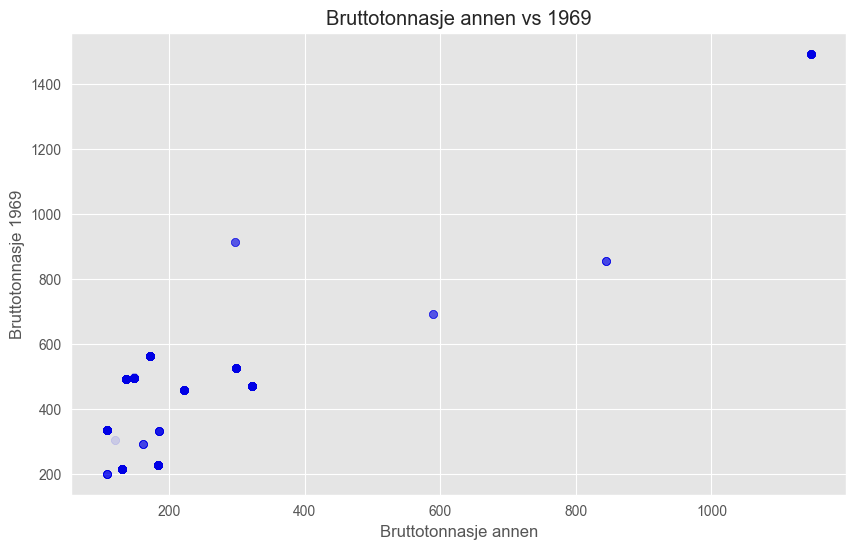

In [1310]:
plt.figure(figsize=(10, 6))
plt.scatter(filtrert_df['Bruttotonnasje annen'], filtrert_df['Bruttotonnasje 1969'], color='blue', alpha=0.01)
plt.title('Bruttotonnasje annen vs 1969')
plt.xlabel('Bruttotonnasje annen')
plt.ylabel('Bruttotonnasje 1969')
plt.show()

In [1311]:
df.drop(['Bruttotonnasje 1969', 'Bruttotonnasje annen'], axis=1, inplace=True)

In [1312]:
df = df.dropna()

## Step 3 - Feature Understanding

Here we will primarily use univariate analysis to understand the individual variables better.

To start off it's useful to draw histograms of all numeric variables. This will help us understand the variance of the data, help us identify outliers which can negatively affect our models, etc.

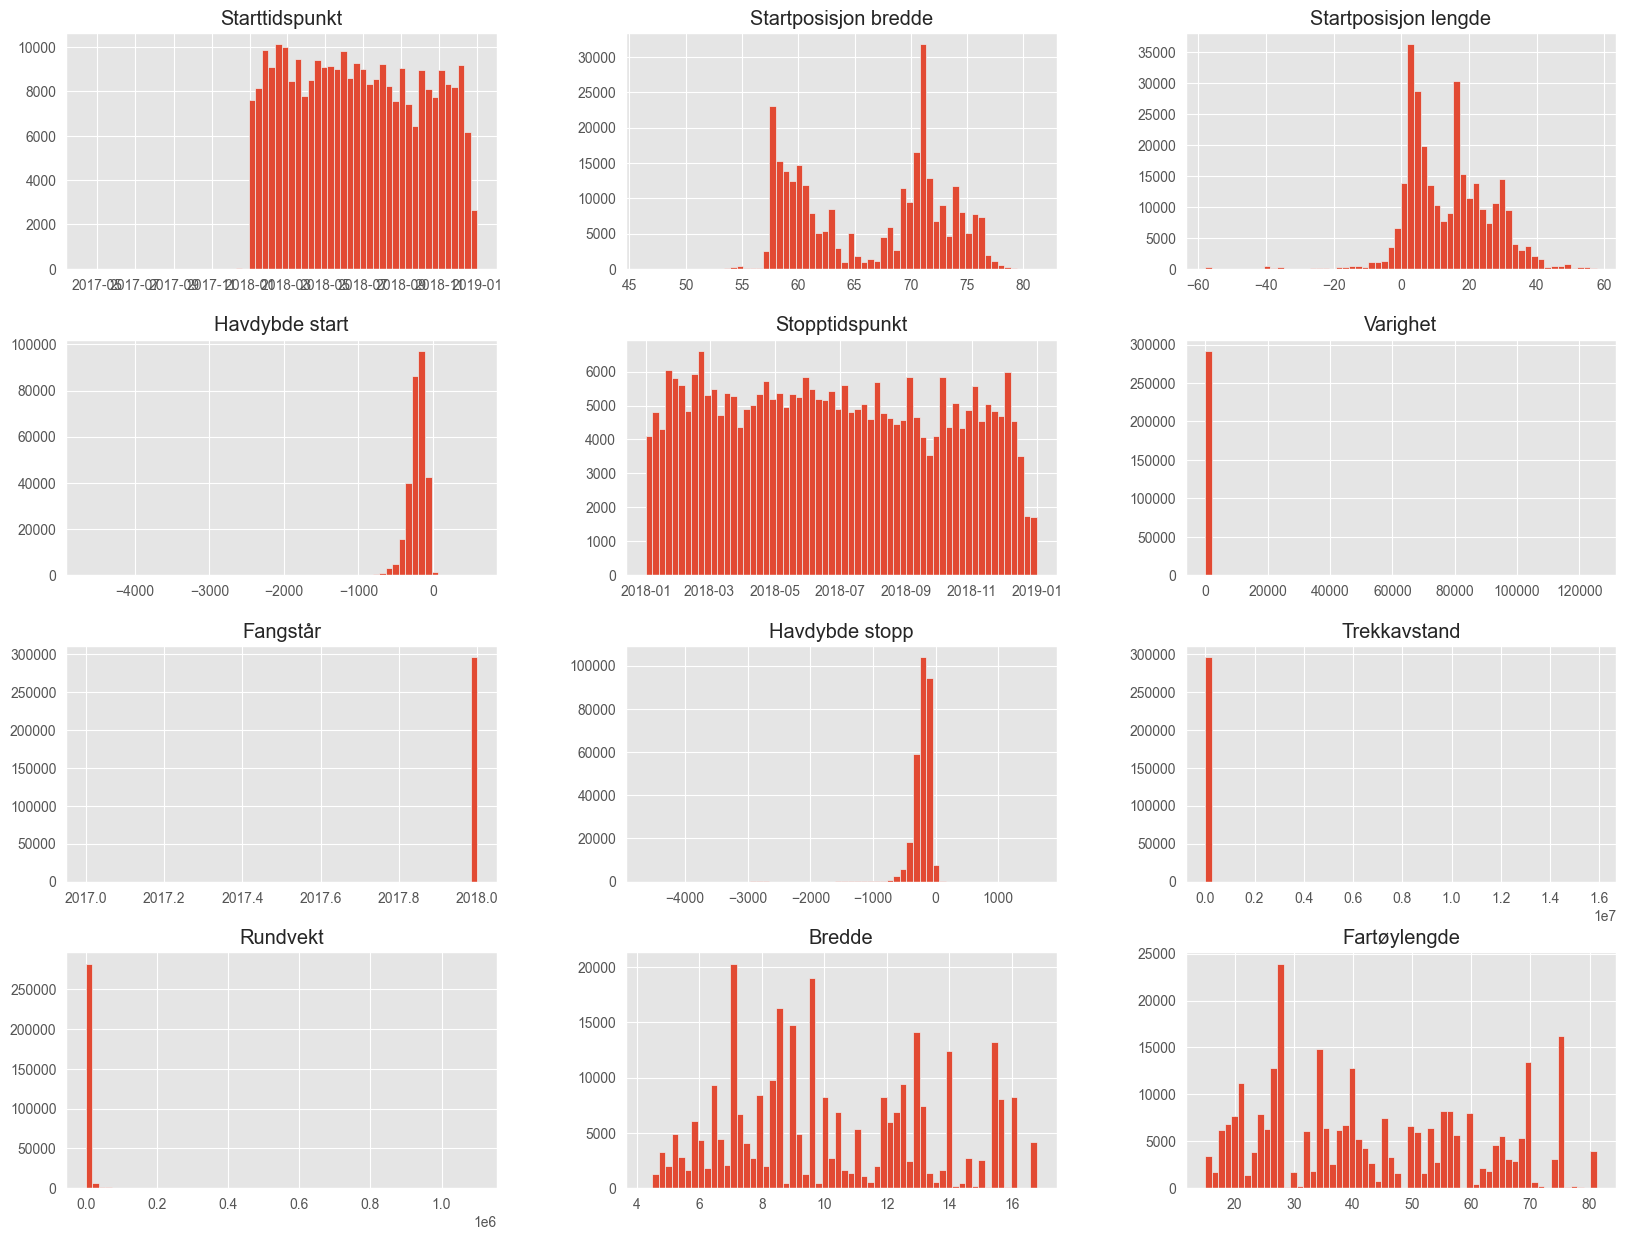

In [1313]:
df.hist(bins=60, figsize=(20,15));plt.show()

In the resulting histogram its clear that some columns, such as "Varighet" and "Rundvekt" have outliers that can affect the quality of our models. To further analyse these variables a boxplot is useful.  

In [1314]:
def draw_boxplots(variables):
    num_of_features = len(variables)
    
    num_of_columns = 5
    num_of_rows = int(np.ceil(num_of_features / num_of_columns))
    
    fig, axes = plt.subplots(nrows=num_of_rows, ncols=num_of_columns, figsize=(15, num_of_rows * num_of_columns))
    axes = axes.flatten()

    for i, col in enumerate(variables):
        df.boxplot(column=col, ax=axes[i])
    
    # Hide empty subplots when (number_of_features < num_of_rows * num_of_columns)
    for i in range(num_of_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

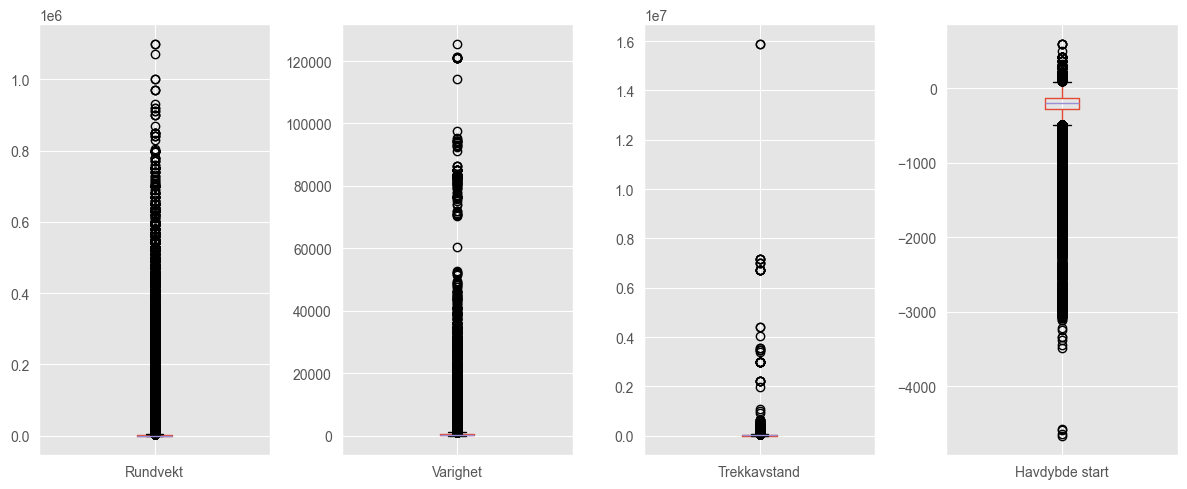

In [1315]:
heavy_outliers = ['Rundvekt', 'Varighet', 'Trekkavstand', 'Havdybde start']
draw_boxplots(heavy_outliers)

Lets count the numer of outliers

In [1316]:
def find_outlier_value(feature : str):
    """
    Outlier is defined as 1.5 * IQR +- nearest quartile
    
    :param feature: name of the column in the DataFrame  
    :return: tuple (lower_bound, upper_bound) which represents the upper and lower bound of outliers in the DataFrame column. 
    """
    q1 = df[feature].quantile(0.25)
    q2 = df[feature].quantile(0.75)
    iqr = q2 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q2 + 1.5 * iqr
    lower_bound_extreme = q1 - 3 * iqr
    upper_bound_extreme = q2 + 3 * iqr
    
    return lower_bound, upper_bound, lower_bound_extreme, upper_bound_extreme

In [1317]:
data = []

for feature in heavy_outliers:
    lower, upper, lower_extreme, upper_extreme = find_outlier_value(feature)
    count = df.query(f'(`{feature}` < @lower) or (`{feature}` > @upper)').shape[0]
    count_extreme = df.query(f'(`{feature}` < @lower_extreme) or (`{feature}` > @upper_extreme)').shape[0]
    data.append({'Feature': feature, 'Outliers': count, 'Extreme outliers': count_extreme})

outliers_df = pd.DataFrame(data)
print(outliers_df)

          Feature  Outliers  Extreme outliers
0        Rundvekt     44106             30123
1        Varighet     24844              4132
2    Trekkavstand      5656               997
3  Havdybde start      9919              3290


We have many (extreme) outliers, specificly in the feature "Rundvekt". We need to deal with this.

Lets explore some normalization options.

In [1318]:
_,_,_,extreme_upper = find_outlier_value('Rundvekt')

df['Rundvekt_clipped'] = df['Rundvekt'].clip(0, extreme_upper)

<Axes: >

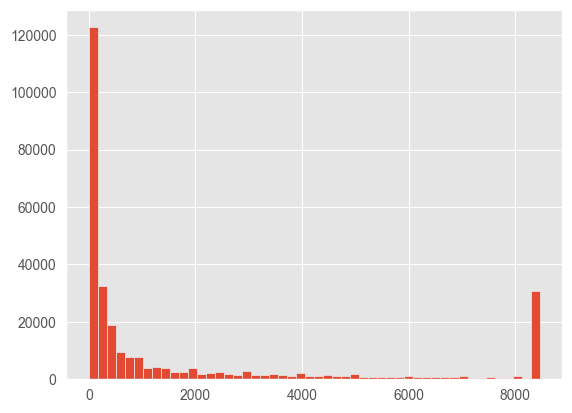

In [1319]:
df['Rundvekt_clipped'].hist(bins=50)

<Axes: >

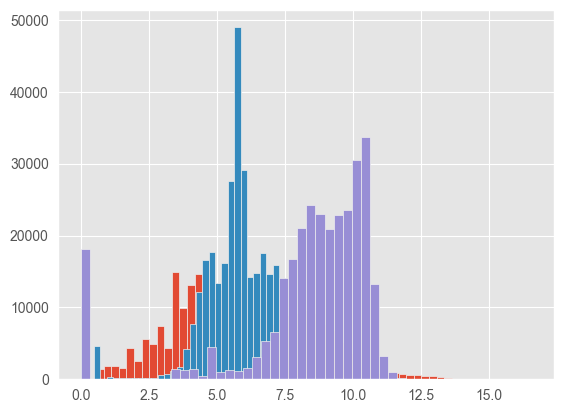

In [1320]:
df['Rundvekt_log'] = np.log(df['Rundvekt'] + 1)
df['Varighet_log'] = np.log(df['Varighet'] + 1)
df['Trekkavstand_log'] = np.log(df['Trekkavstand'] + 1)

df['Rundvekt_log'].hist(bins=50)
df['Varighet_log'].hist(bins=50)
df['Trekkavstand_log'].hist(bins=50)

In [1321]:
df = df.query('Rundvekt < @extreme_upper')
df

,Starttidspunkt,Startposisjon bredde,Startposisjon lengde,Hovedområde start,Havdybde start,Stopptidspunkt,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,...,Redskap FDIR,Art - FDIR,Art - gruppe,Rundvekt,Bredde,Fartøylengde,Rundvekt_clipped,Rundvekt_log,Varighet_log,Trekkavstand_log
3,2017-12-30 23:21:00,74.885,16.048,Bjørnøya,-335,2017-12-31 04:16:00,295,2017,"74,914","15,969",...,Bunntrål,Blåkveite,Blåkveite,196.0,12.6,56.8,196.0,5.283204,5.690359,8.286773
4,2017-12-30 23:21:00,74.885,16.048,Bjørnøya,-335,2017-12-31 04:16:00,295,2017,"74,914","15,969",...,Bunntrål,Sei,Sei,134.0,12.6,56.8,134.0,4.905275,5.690359,8.286773
6,2017-12-31 05:48:00,74.910,15.868,Bjørnøya,-403,2017-12-31 10:15:00,267,2017,"74,901","16,248",...,Bunntrål,Torsk,Torsk,6651.0,12.6,56.8,6651.0,8.802673,5.590987,9.314430
7,2017-12-31 05:48:00,74.910,15.868,Bjørnøya,-403,2017-12-31 10:15:00,267,2017,"74,901","16,248",...,Bunntrål,Blåkveite,Blåkveite,130.0,12.6,56.8,130.0,4.875197,5.590987,9.314430
8,2017-12-31 05:48:00,74.910,15.868,Bjørnøya,-403,2017-12-31 10:15:00,267,2017,"74,901","16,248",...,Bunntrål,Flekksteinbit,Steinbiter,82.0,12.6,56.8,82.0,4.418841,5.590987,9.314430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305429,2018-12-31 19:41:00,76.906,12.709,Vest-Spitsbergen,-349,2018-12-31 23:33:00,232,2018,"77,091","11,965",...,Bunntrål,Gråsteinbit,Steinbiter,145.0,12.6,57.3,145.0,4.983607,5.451038,10.234804
305430,2018-12-31 19:41:00,76.906,12.709,Vest-Spitsbergen,-349,2018-12-31 23:33:00,232,2018,"77,091","11,965",...,Bunntrål,Uer (vanlig),Uer,136.0,12.6,57.3,136.0,4.919981,5.451038,10.234804
305431,2018-12-31 19:41:00,76.906,12.709,Vest-Spitsbergen,-349,2018-12-31 23:33:00,232,2018,"77,091","11,965",...,Bunntrål,Flekksteinbit,Steinbiter,132.0,12.6,57.3,132.0,4.890349,5.451038,10.234804
305432,2018-12-31 19:41:00,76.906,12.709,Vest-Spitsbergen,-349,2018-12-31 23:33:00,232,2018,"77,091","11,965",...,Bunntrål,Snabeluer,Uer,102.0,12.6,57.3,102.0,4.634729,5.451038,10.234804


## Step 4 : Feature relationship

Now that we have explored the individual variables by themselves. We will now do a multivariate analysis.

In [1322]:
sampled_df = df.sample(n=50000)

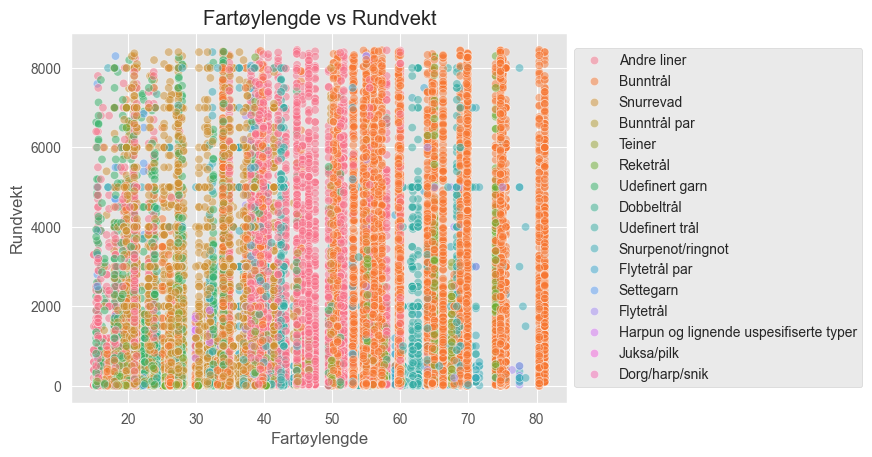

In [1323]:
ax = sns.scatterplot(x='Fartøylengde',
                     y='Rundvekt',
                     hue='Redskap FDIR',
                     data=sampled_df,
                     alpha=0.5)
ax.set_title('Fartøylengde vs Rundvekt')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Plasserer legenden på siden
plt.show()

In [1324]:
features_log = ['Fartøylengde', 'Rundvekt_log', 'Varighet_log','Trekkavstand_log', 'Havdybde start']
features = ['Fartøylengde', 'Rundvekt', 'Varighet','Trekkavstand', 'Havdybde start']

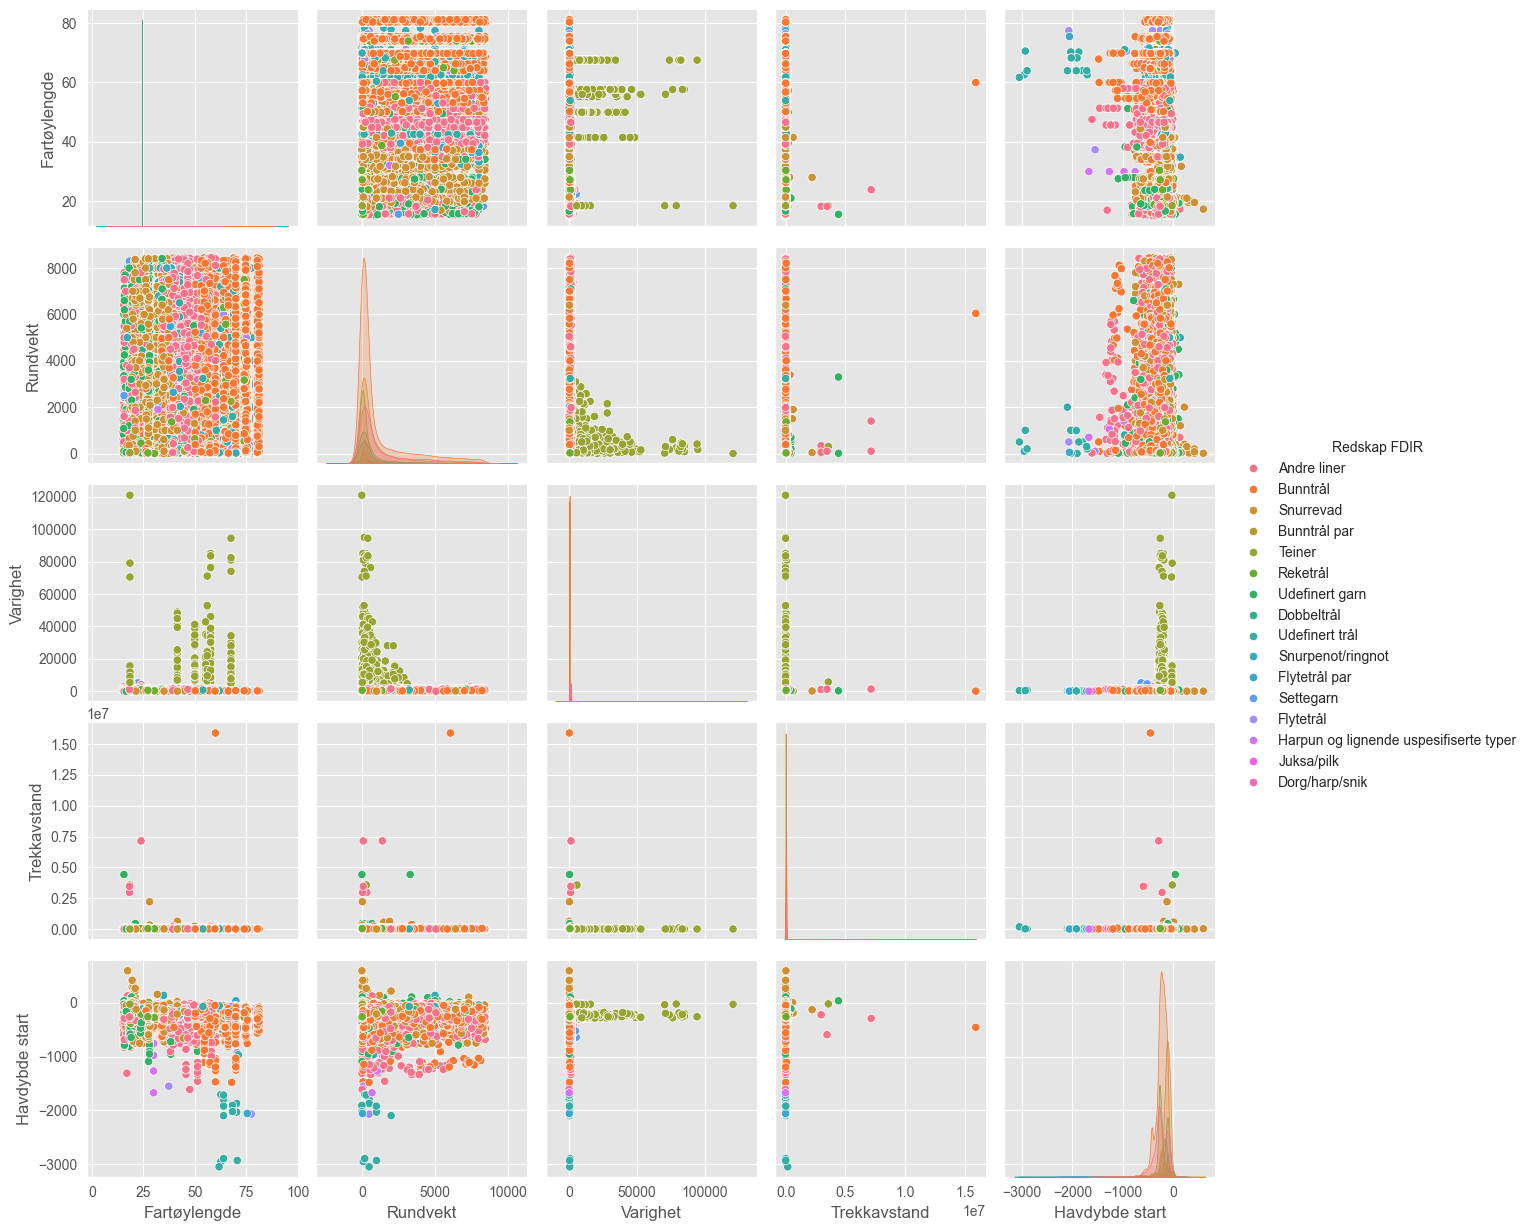

In [1325]:
sns.pairplot(sampled_df, vars=features, hue='Redskap FDIR')
plt.show()

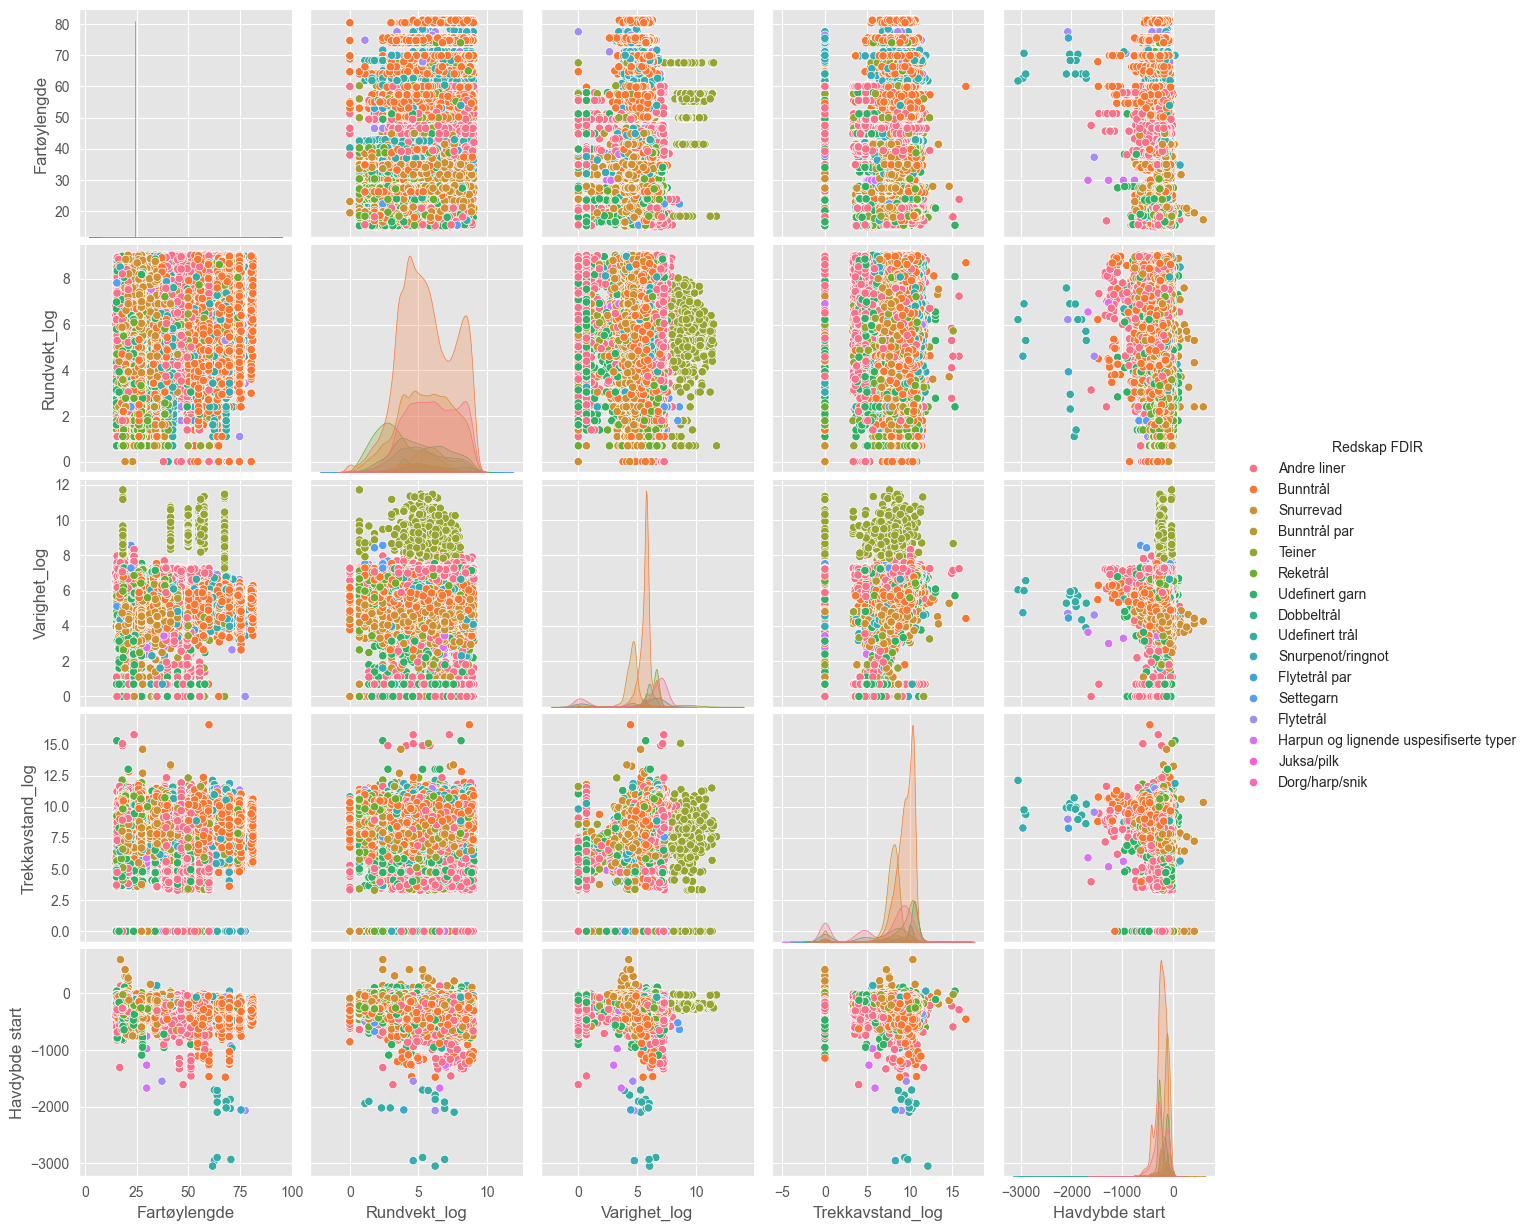

In [1326]:
sns.pairplot(sampled_df, vars=features_log, hue='Redskap FDIR')
plt.show()

In [1327]:
df_corr = df[features].corr()
df_corr

,Fartøylengde,Rundvekt,Varighet,Trekkavstand,Havdybde start
Fartøylengde,1.000000,0.209454,0.035000,0.006799,-0.210004
Rundvekt,0.209454,1.000000,-0.030398,-0.011024,-0.056560
Varighet,0.035000,-0.030398,1.000000,0.002645,-0.024937
Trekkavstand,0.006799,-0.011024,0.002645,1.000000,-0.030173
Havdybde start,-0.210004,-0.056560,-0.024937,-0.030173,1.000000


<Axes: >

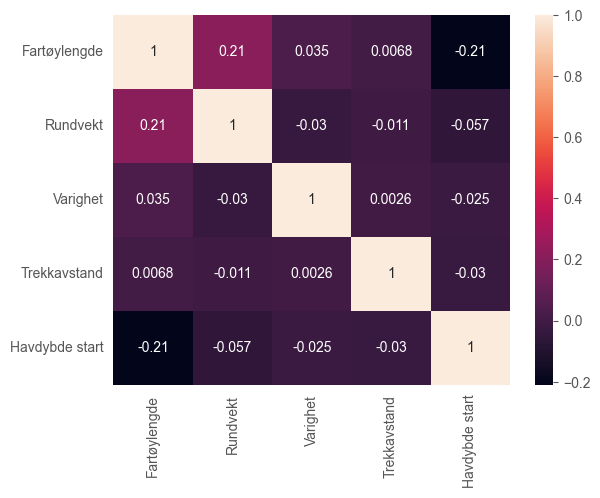

In [1328]:
sns.heatmap(df_corr, annot=True)

In [1329]:
df_log = df[['Art - FDIR','Rundvekt_log', 'Redskap FDIR', 'Fartøylengde', 'Havdybde start']].copy()
df_log

,Art - FDIR,Rundvekt_log,Redskap FDIR,Fartøylengde,Havdybde start
3,Blåkveite,5.283204,Bunntrål,56.8,-335
4,Sei,4.905275,Bunntrål,56.8,-335
6,Torsk,8.802673,Bunntrål,56.8,-403
7,Blåkveite,4.875197,Bunntrål,56.8,-403
8,Flekksteinbit,4.418841,Bunntrål,56.8,-403
...,...,...,...,...,...
305429,Gråsteinbit,4.983607,Bunntrål,57.3,-349
305430,Uer (vanlig),4.919981,Bunntrål,57.3,-349
305431,Flekksteinbit,4.890349,Bunntrål,57.3,-349
305432,Snabeluer,4.634729,Bunntrål,57.3,-349


In [1330]:
df_log = pd.get_dummies(df_log, columns=['Art - FDIR'])
df_log = pd.get_dummies(df_log, columns=['Redskap FDIR'])
df_log

,Rundvekt_log,Fartøylengde,Havdybde start,Art - FDIR_Akkar,Art - FDIR_Annen blekksprut,Art - FDIR_Annen flatfisk,Art - FDIR_Annen flyndre,Art - FDIR_Annen makrell,Art - FDIR_Annen marin fisk,Art - FDIR_Annen sardin,...,Redskap FDIR_Flytetrål par,Redskap FDIR_Harpun og lignende uspesifiserte typer,Redskap FDIR_Juksa/pilk,Redskap FDIR_Reketrål,Redskap FDIR_Settegarn,Redskap FDIR_Snurpenot/ringnot,Redskap FDIR_Snurrevad,Redskap FDIR_Teiner,Redskap FDIR_Udefinert garn,Redskap FDIR_Udefinert trål
3,5.283204,56.8,-335,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.905275,56.8,-335,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,8.802673,56.8,-403,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,4.875197,56.8,-403,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,4.418841,56.8,-403,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305429,4.983607,57.3,-349,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
305430,4.919981,57.3,-349,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
305431,4.890349,57.3,-349,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
305432,4.634729,57.3,-349,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1331]:
df_n = df[['Art - FDIR','Rundvekt', 'Redskap FDIR', 'Fartøylengde', 'Havdybde start']].copy()

In [1332]:
df_n = pd.get_dummies(df_n, columns=['Art - FDIR'])
df_n = pd.get_dummies(df_n, columns=['Redskap FDIR'])
df_n

,Rundvekt,Fartøylengde,Havdybde start,Art - FDIR_Akkar,Art - FDIR_Annen blekksprut,Art - FDIR_Annen flatfisk,Art - FDIR_Annen flyndre,Art - FDIR_Annen makrell,Art - FDIR_Annen marin fisk,Art - FDIR_Annen sardin,...,Redskap FDIR_Flytetrål par,Redskap FDIR_Harpun og lignende uspesifiserte typer,Redskap FDIR_Juksa/pilk,Redskap FDIR_Reketrål,Redskap FDIR_Settegarn,Redskap FDIR_Snurpenot/ringnot,Redskap FDIR_Snurrevad,Redskap FDIR_Teiner,Redskap FDIR_Udefinert garn,Redskap FDIR_Udefinert trål
3,196.0,56.8,-335,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,134.0,56.8,-335,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,6651.0,56.8,-403,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,130.0,56.8,-403,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,82.0,56.8,-403,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305429,145.0,57.3,-349,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
305430,136.0,57.3,-349,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
305431,132.0,57.3,-349,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
305432,102.0,57.3,-349,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1333]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [1334]:
def run_model(dataframe, target):
    y = dataframe[[target]]
    X = dataframe.drop([target], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf = RandomForestRegressor(random_state=42)
    
    param_grid = {
        'n_estimators': [90, 128],
        'max_depth': [12, 15],
    }

    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    
    return grid_search.fit(X_train, y_train), X_test, y_test

In [1335]:
for (d, t) in [(df_n, 'Rundvekt'), (df_log, 'Rundvekt_log')]:
    
    model_result, X_test, y_test = run_model(d, t)
    
    best_params = model_result.best_params_
    print("Beste parametere:", best_params)
    
    best_rf = model_result.best_estimator_
    
    predictions = best_rf.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print("MSE for den optimale modellen:", mse)
    
    r2 = r2_score(y_test, predictions)
    print("R^2-score for den optimale modellen:", r2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\th0ma\Documents\GitHub\INFO284\venv\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Beste parametere: {'max_depth': 15, 'n_estimators': 128}
MSE for den optimale modellen: 1690144.7939482967
R^2-score for den optimale modellen: 0.44774267962517744
Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\th0ma\Documents\GitHub\INFO284\venv\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Beste parametere: {'max_depth': 15, 'n_estimators': 128}
MSE for den optimale modellen: 1.637096279957051
R^2-score for den optimale modellen: 0.5721105598931413
